### Write a method called Con2D(img,kernel), which takes an image and kernel as input that performs convolution of the img with kernel. Return the output image from the method. You must write your own implementation for this method without using any library.

In [113]:
# import necessary library
import matplotlib.pyplot as plt
# for computer vision operations
import cv2 as cv
#for conversion 
import numpy as np
import cv2

In [122]:
# for read image
img  = plt.imread("PIC.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

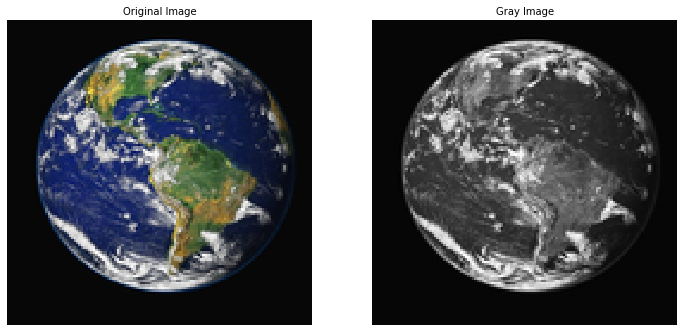

In [124]:
# define loop for fram
fig, axs = plt.subplots(1,2,figsize=(12,12))
# presented orignal image
axs[0].imshow(img,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
# presented inverse image
axs[1].imshow(gray,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Gray Image',fontsize='medium')
plt.show()

In [123]:
# Shape of Original Image
img.shape

(128, 128, 3)

In [127]:
# Shape of gray Image
gray.shape

(128, 128)

In [128]:
#Conversion numpy to list
Img_Matrix = gray.tolist()

In [129]:
# Intilize Kernal
Kernal_np = np.random.randint(1, 7, size=(3, 3))
#Conversion numpy to list
Kernal = Kernal_np.tolist()
Kernal

[[5, 5, 5], [5, 2, 4], [2, 5, 3]]

### Convolution Function

In [105]:
def conv_inage(imag, Kernal):
    # Assignmnet
    Img_Matrix = imag
    # find number of rows
    rows = len(Img_Matrix)
    # find number of column
    col = len(Img_Matrix[0])
    
    #*****ADD PADDING ARROUNS IMAGE********
    # Loop for row
    for i in range(len(Img_Matrix)+1):
        # intilize 1D row
        row=[]
        # Add padding at strat of matrix
        if i==0:
            # loop for column
            for j in range(len(Img_Matrix[i])):
                # Append 0 value in row
                row.append(0)
            # Insert row in orignal image matres at start
            Img_Matrix.insert(0,row)
        # Add padding at end of matrix
        if i== len(Img_Matrix)-1:
            # Add padding at strat  and end of matrix in each row
            L=len(Img_Matrix[i])+2
            for j in range(L):
                # Append 0 value in row
                row.append(0)
            # Insert 0 in orignal image matres at end of each row
            Img_Matrix.insert(i+1,row)
        # Insert 0 in orignal image matres at start of each row    
        Img_Matrix[i].insert(0,0)
        # Append padding in rignal matrix row
        Img_Matrix[i].append(0)
    #***************************************
    # Intillize Array or list
    Final_Image = []
    # loop for row
    for i in range(0,rows):
        # intilize 1d row
        row = []
        # loop for column
        for j in range(0,col):
            # intilize sum variable
            sum = 0
            # loop control for kenal row
            for k in range(len(Kernal)):
                # loop for kernal column
                for l in range(len(Kernal[k])):
                    # sum of dot product between kernal and eaxh pixal value of matrix
                    sum = sum + (Kernal[k][l] *  Img_Matrix[i+k][j+l])
            # append value of sem in row
            row.append(sum)
        # append 1D row in new image construction
        Final_Image.append(row)
    # returm updated image
    return Final_Image
    

### Function Calling

In [130]:
Final_Image = [[]] 
Final_Image =  conv_inage(Img_Matrix , Kernal)

128


In [131]:
# convort matrix to numpay 
FM = np.array(Final_Image )
FM.shape

(128, 128)

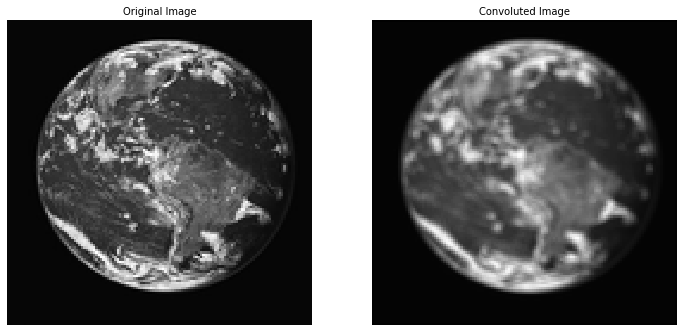

In [132]:
# define loop for fram
fig, axs = plt.subplots(1,2,figsize=(12,12))
# presented orignal image
axs[0].imshow(gray,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
# presented inverse image
axs[1].imshow(FM,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Convoluted Image',fontsize='medium')
plt.show()